In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import sklearn
import cv2
import seaborn as sns
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
 


# Mục mới

In [ ]:
root_dir = "/content/drive/MyDvxacrive/dataset"
os.listdir(root_dir)

['test.csv', 'sunrise', 'foggy', 'cloudy', 'rainy', 'shine', 'alien_test']

In [ ]:
foggy = "/content/drive/MyDrive/dataset/foggy"
sunrise = "/content/drive/MyDrive/dataset/sunrise"
shine = "/content/drive/MyDrive/dataset/shine"
rainy = "/content/drive/MyDrive/dataset/rainy"
cloudy = "/content/drive/MyDrive/dataset/cloudy"
test = "/content/drive/MyDrive/dataset/alien_test"

In [ ]:
print("Số lượng hình ảnh trong mỗi thư mục:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")
print(f"Test: {len(os.listdir(test))}")

Số lượng hình ảnh trong mỗi thư mục:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300
Test: 30


In [ ]:
#XỬ LÝ DỮ LIỆU
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

**gán nhãn dữ liệu**

In [ ]:
#DANH SÁCH DỮ LIỆU ẢNH VÀ NHÃN TƯƠNG ỨNG
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")
#test
test_csv = pd.read_csv("/content/drive/MyDrive/dataset/test.csv")
for i in test_csv.iterrows():
    full_path = test+"/"+i[1][0]
    try:
        img = cv2.imread(full_path)
        img = cv2.resize(img,(150,150))
    except:
        continue
    x.append(img)
    label = ""
    if(i[1][1]==0):
        label="cloudy"
    elif(i[1][1]==1):
        label="foggy"
    elif(i[1][1]==2):
        label="rainy"
    elif(i[1][1]==3):
        label="shine"
    else:
        label="sunrise"
        
    y.append(label)

100%|██████████| 300/300 [00:04<00:00, 68.81it/s] 


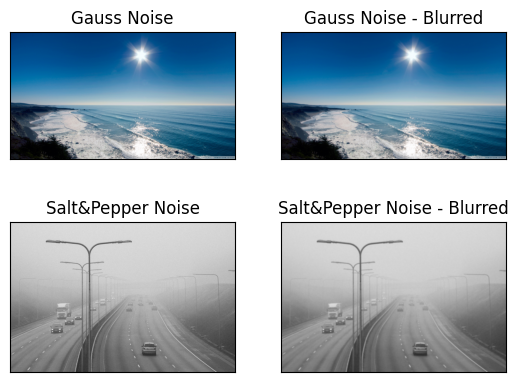

In [ ]:
#ÁP DỤNG XỬ LÝ ẢNH : LỌC làm mờ ảnh,Salt & Pepper được sử dụng để giảm nhiễu ảnh

img = cv2.imread('/content/drive/MyDrive/dataset/shine/shine1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/dataset/foggy/foggy1.jpg')
blur = cv2.blur(img,(5,5))
blur2 = cv2.blur(img2,(5,5))

# Convert color from bgr (OpenCV default) to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
blur_rgb2 = cv2.cvtColor(blur2, cv2.COLOR_BGR2RGB)

# Display
plt.subplot(221),plt.imshow(img_rgb),plt.title('Gauss Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(blur_rgb),plt.title('Gauss Noise - Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(img_rgb2),plt.title('Salt&Pepper Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(blur_rgb2),plt.title('Salt&Pepper Noise - Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1528, 150, 150, 3), (1528,))

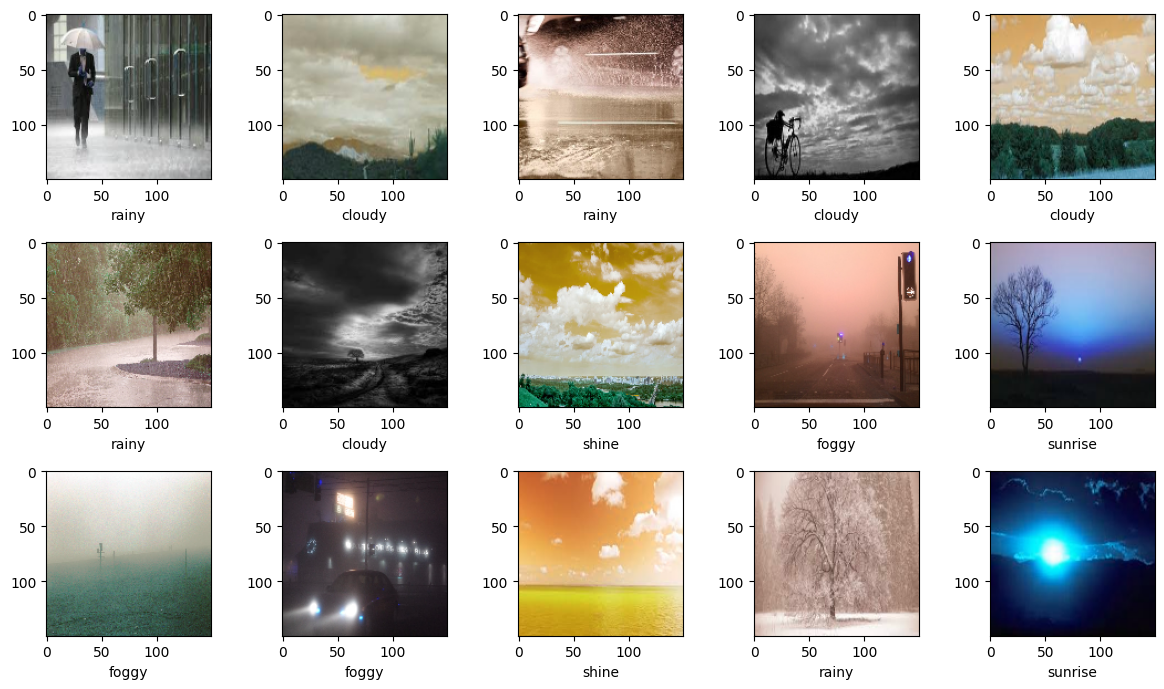

In [12]:
#SHOW HÌNH ẢNH NGẪU NHIÊN BIỂU DIỄN SỰ TRỰC QUA VỀ NHÃN VÀ HÌNH ẢNH TƯƠNG ỨNG VỚI NHÃN
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

***chia tập dữ liệu ***

In [14]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.3,random_state=42)

**quy trình huấn luyện**

In [15]:
#80-20
#ImageDataGenerator : tăng cường hình ảnh trong quá trình đào tạo bằng cách áp dụng các biến đổi khác nhau
datagen = ImageDataGenerator(
    rotation_range= 10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False, #Lật ngang ngẫu nhiên hình ảnh
    vertical_flip=False #lật dọc
)

datagen.fit(x_train) # tính toán số liệu thống kê cần thiết cho tăng cường dữ liệu dựa trên tham số trên

In [16]:
#70-30
datagen1 = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# fit generator on our train features
datagen1.fit(x_train1)

In [17]:
# Tiền xử lý dữ liệu trên tập dữ liệu hình ảnh trước khi đưa vào quá trình huấn luyện mô hình
#80 - 20
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [18]:
#70 - 30
x_train1 = np.array(x_train1)/255.0
x_test1 = np.array(x_test1)/255.0


x_train1 = x_train1.reshape(-1,img_size,img_size,3)
y_train1 = np.array(y_train1)

x_test1 = x_test1.reshape(-1,img_size,img_size,3)
y_test1 = np.array(y_test1)

In [19]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
#LabelBinarizer :chuyển đổi các nhãn phân loại thành các vectơ nhị phân
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)
y_train_lb1 = lb.fit_transform(y_train1)
y_test_lb1 = lb.fit_transform(y_test1)

**kết quả 80-20**


In [20]:
y_train_lb.shape,y_test_lb.shape

((1222, 5), (306, 5))

**kết quả 70-30**


In [21]:
y_train_lb1.shape,y_test_lb1.shape

((1069, 5), (459, 5))

In [22]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

**Thuật toán VGG**

In [ ]:
#tạo model 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model =Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5,activation="softmax"))
model1 =Sequential()
model1.add(vgg)
model1.add(Flatten())
model1.add(Dense(5,activation="softmax"))
model.summary()

In [ ]:
model1.summary()

In [ ]:
#80-20
unique,counts = np.unique(y_train_lb,return_counts=True)
print(unique,counts)

In [ ]:
#70-30
unique1,counts1 = np.unique(y_train_lb1,return_counts=True)
print(unique1,counts1)

In [ ]:
#TÍNH SỰ MẤT MÁT VÀ CÁC SỐ LIỆU TRONG QTRINH ĐÀO TẠO
#optimizer="adam": Trình tối ưu hóa Adam được sử dụng, đây là một thuật toán tối ưu hóa phổ biến để đào tạo mạng nơ-ron

# 80-20
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)
#PATIENCE :ngăn ngừa quá tải và tối ưu hóa thời gian đào tạo

In [ ]:
#70-30
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

checkpoint1 = ModelCheckpoint("vgg16_2.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop1 = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

**train model**

In [ ]:
#80-20
batch_size=64
history =  model.fit(x_train,y_train_lb,epochs=10,validation_data=(x_test,y_test_lb),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop])

In [ ]:
#70-30
batch_size=64
history1 =  model1.fit(x_train1,y_train_lb1,epochs=10,validation_data=(x_test1,y_test_lb1),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint1,earlystop1])

Epoch 1/10
34/34 [==============================] - ETA: 0s - loss: 0.9169 - accuracy: 0.6558
Epoch 1: val_accuracy improved from -inf to 0.82353, saving model to vgg16_2.h5
34/34 [==============================] - 444s 13s/step - loss: 0.9169 - accuracy: 0.6558 - val_loss: 0.5610 - val_accuracy: 0.8235
Epoch 2/10
34/34 [==============================] - ETA: 0s - loss: 0.4255 - accuracy: 0.8775
Epoch 2: val_accuracy improved from 0.82353 to 0.85403, saving model to vgg16_2.h5
34/34 [==============================] - 430s 13s/step - loss: 0.4255 - accuracy: 0.8775 - val_loss: 0.4335 - val_accuracy: 0.8540
Epoch 3/10
34/34 [==============================] - ETA: 0s - loss: 0.3005 - accuracy: 0.9158
Epoch 3: val_accuracy improved from 0.85403 to 0.89978, saving model to vgg16_2.h5
34/34 [==============================] - 442s 13s/step - loss: 0.3005 - accuracy: 0.9158 - val_loss: 0.3674 - val_accuracy: 0.8998
Epoch 4/10
34/34 [==============================] - ETA: 0s - loss: 0.2434 - ac

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print("-----------80/20-----------")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
loss1,accuracy1 = model1.evaluate(x_test1,y_test_lb1)
print("-----------70/30-----------")
print(f"Loss: {loss1}")
print(f"Accuracy: {accuracy1}")

#LOSS: PHẦN TRĂM MẤT MÁT

10/10 [==============================] - 90s 9s/step - loss: 0.2663 - accuracy: 0.9346
-----------80/20-----------
Loss: 0.26629185676574707
Accuracy: 0.9346405267715454
15/15 [==============================] - 125s 8s/step - loss: 0.3391 - accuracy: 0.8867
-----------70/30-----------
Loss: 0.33911627531051636
Accuracy: 0.8867102265357971


In [ ]:
#dự đoán nhãn cho dữ liệu thử nghiệm bằng cách sử dụng mô hình được đào tạo và lưu trữ các dự đoán
#80-20
y_pred = model.predict(x_test).astype(float,casting='same_kind')
y_pred[:15]

10/10 [==============================] - 83s 8s/step


array([[5.50454250e-04, 3.53765726e-01, 6.64456654e-03, 1.03169978e-02,
        6.28722191e-01],
       [3.64771150e-02, 9.42475498e-01, 1.68607908e-03, 7.16143986e-03,
        1.21998070e-02],
       [8.25068710e-05, 4.08910826e-04, 9.99476492e-01, 8.55299004e-06,
        2.34337986e-05],
       [3.96120548e-02, 8.92835786e-04, 6.83195249e-04, 9.48136985e-01,
        1.06748194e-02],
       [2.28884703e-04, 4.58159848e-05, 9.99724984e-01, 4.02866988e-07,
        5.24644221e-08],
       [1.55065948e-06, 3.87717373e-05, 9.99958813e-01, 8.02936995e-07,
        3.99024458e-08],
       [4.99649309e-02, 2.27917433e-02, 1.02156028e-03, 1.48607746e-01,
        7.77613997e-01],
       [2.37920001e-01, 1.33515531e-02, 2.15773582e-01, 5.30866563e-01,
        2.08822242e-03],
       [7.68544912e-01, 1.26657888e-01, 9.20366570e-02, 2.71259295e-03,
        1.00479005e-02],
       [2.42558168e-03, 6.70284906e-04, 9.96787190e-01, 1.15828872e-04,
        1.10177382e-06],
       [9.17908609e-01, 4.1566

In [ ]:
#70-30
y_pred1 = model1.predict(x_test1).astype(float,casting='same_kind')
y_pred1[:15]

15/15 [==============================] - 128s 8s/step


array([[3.23079614e-04, 7.07203805e-01, 1.26792649e-02, 3.99596542e-02,
        2.39834249e-01],
       [1.71558559e-02, 9.72834349e-01, 5.16545435e-04, 7.50732189e-03,
        1.98592874e-03],
       [4.36188166e-05, 1.48079114e-03, 9.98412311e-01, 4.58737086e-05,
        1.74749093e-05],
       [2.60832198e-02, 2.46285787e-03, 2.13113599e-04, 9.64356363e-01,
        6.88451109e-03],
       [6.83445891e-04, 3.79347795e-04, 9.98935282e-01, 1.90651485e-06,
        2.90465696e-08],
       [1.63750371e-06, 1.53700646e-04, 9.99840260e-01, 4.54046949e-06,
        1.43036196e-08],
       [7.19915405e-02, 6.20514452e-02, 7.99939560e-04, 3.51338744e-01,
        5.13818324e-01],
       [2.02475667e-01, 2.50472110e-02, 1.83410719e-01, 5.88361144e-01,
        7.05254381e-04],
       [6.65213108e-01, 2.66684324e-01, 5.56698330e-02, 6.63345819e-03,
        5.79923717e-03],
       [1.20685820e-03, 3.80135444e-03, 9.94582474e-01, 4.07286134e-04,
        1.96911719e-06],
       [9.07104254e-01, 7.5988

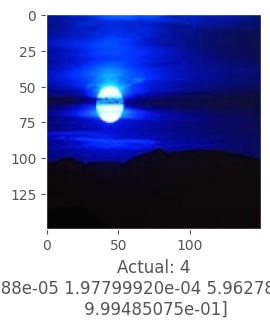

In [ ]:
# 0 "cloudy"
# 1 "foggy"
# 2 "rainy"
# 3 "shine"
# 4 "sunrise"
#dự đoán 1 ảnh ngẫu nhiên
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(1):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test[sample])
    plt.grid(False)
    y_R= y_pred[sample]
    plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_R}")
    
plt.tight_layout()    
plt.grid(False)
plt.show()

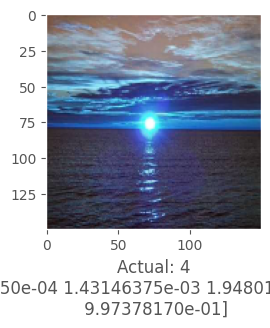

In [ ]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(1):
    sample1 = random.choice(range(len(x_test1)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test1[sample1])
    plt.grid(False)
    y_R1= y_pred1[sample1]
    plt.xlabel(f"Actual: {y_test1[sample1]}\n Predicted: {y_R1}")
    
plt.tight_layout()    
plt.grid(False)
plt.show()

In [ ]:
from  tensorflow.keras import callbacks 
from  tensorflow.keras.callbacks import TensorBoard
import datetime
import tensorflow

In [ ]:
model.save('Weather_80_20.h5')
model1.save('Weather_70_30.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#phát hiện đối tượng
#khi train không nên xây model
#train xem có nhớ không lấy ngẫu nhiên để xem có đúng không , sau khi lấy ảnh test (test độc lập với train) 
#chia dữ liệu nhiều 
#so sánh vgg16 (đổi sofmax xem có đổi không, relu,...)
#nên viết app(web,app)